# Проект: Определение стоимости автомобилей

___
**Описание проекта**  

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей.

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.
___
**Цель**  

Вам нужно построить модель для определения стоимости. Постройте модель, которая умеет её определять. В вашем распоряжении данные о технических характеристиках, комплектации и ценах других автомобилей.
___
**Примечания:**

- Для оценки качества моделей применяйте метрику RMSE.
- Значение метрики RMSE должно быть меньше 2500.
- Самостоятельно освойте библиотеку LightGBM и её средствами постройте модели градиентного бустинга.
- Время выполнения ячейки кода Jupyter Notebook можно получить специальной командой. Найдите её.
- Модель градиентного бустинга может долго обучаться, поэтому измените у неё только два-три параметра.
- Если перестанет работать Jupyter Notebook, удалите лишние переменные оператором `del`.
___
**Описание данных:**  

Данные находятся в файле `/datasets/autos.csv`

*Признаки*

- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `Repaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя

*Целевой признак*

- `Price` — цена (евро)

<h1>Содержание<span class="tocSkip"></span></h1><br>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1">
            <span class="toc-item-num">1.&nbsp;&nbsp;</span>Подготовка данных</a></span>
        </li>
        <li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2">
            <span class="toc-item-num">2.&nbsp;&nbsp;</span>Обучение моделей</a></span>
        </li>
        <li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3">
            <span class="toc-item-num">3.&nbsp;&nbsp;</span>Анализ моделей</a></span>
        </li>
        <li><span><a href="#Проверка-моделей-на-адекватность" data-toc-modified-id="Проверка-моделей-на-адекватность-4">
            <span class="toc-item-num">4.&nbsp;&nbsp;</span>Проверка моделей на адекватность</a></span>
        </li>
        <li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5">
            <span class="toc-item-num">5.&nbsp;&nbsp;</span>Общий вывод</a></span>
        </li>
        <li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6">
            <span class="toc-item-num">6.&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span>
        </li>
    </ul>
</div>

## Подготовка данных

### Импортируем необходимые библиотеки. Считаем данные из csv-файла в датафрейм и сохраним в переменную `df`. Путь к файлу:

`/datasets/autos.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats as st

In [2]:
#Инициализация модели SGDRegressor
from sklearn.linear_model import SGDRegressor

#Инициализация модели CatBoostRegressor
from catboost import CatBoostRegressor

#Инициализация модели LightGBM
import lightgbm as lgb

#Кодирование категориальных признаков в виде одноточечного числового массива
from sklearn.preprocessing import OneHotEncoder

#Кодирование категориальных признаков в виде целочисленного массива.
from sklearn.preprocessing import OrdinalEncoder

#Разделение выборки в заданных пропорциях
from sklearn.model_selection import train_test_split

#Преобразователь масштаба методом стандартизации
from sklearn.preprocessing import StandardScaler

#Создание оценки из метрики производительности или функции потерь
from sklearn.metrics import make_scorer

#Поиск лучших параметров модели
from sklearn.model_selection import GridSearchCV

#Проверка модели на адекватность
from sklearn.dummy import DummyRegressor

#Метрики регрессии
from sklearn.metrics import r2_score, mean_squared_error

#Последовательное перемешивание массивов или разреженных матриц
from sklearn.utils import shuffle

#Сохранение и загрузка обученной модели
import joblib

In [3]:
try:
    df = pd.read_csv('./autos.csv')
except:
    print('File_not_found')

### Изучим общую информацию о полученном датафрейме

**Добавим настройки для удобства отображения данных**

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(suppress=True)

#Если необходимо вернуть дефолтные настройки, раскомментируй строку ниже
#pd.reset_option('all')

**Выведем первые 10 строчек датафрейма `df` на экран.**

In [5]:
df.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


**Посмотрим на размер данных (количество строк, колонок).**

In [6]:
print(f'\nКоличество строк: {df.shape[0]}\nКоличество колонок: {df.shape[1]}\n')


Количество строк: 354369
Количество колонок: 16



**Для удобства, сразу приведем обозначения признаков к "змеиному" регистру.**

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df = df.rename(columns={
    'datecrawled': 'date_crawled',
    'vehicletype': 'vehicle_type',
    'registrationyear': 'registration_year',
    'registrationmonth': 'registration_month',
    'fueltype': 'fuel_type',
    'datecreated': 'date_created',
    'numberofpictures': 'number_of_pictures',
    'postalcode': 'postal_code',
    'lastseen': 'last_seen'
})

In [9]:
df.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

**Просмотрим статистическую сводку каждой колонки, чтобы узнать распределение данных в каждой колонки. Используем метод `describe()`.**

In [10]:
df.describe(include = "all")

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
count,354369,"354,369.00",316879,"354,369.00",334536,"354,369.00",334664,"354,369.00","354,369.00",321474,354369,283215,354369,"354,369.00","354,369.00",354369
unique,271174,NaN,8,NaN,2,NaN,250,NaN,NaN,7,40,2,109,NaN,NaN,179150
top,2016-03-24 14:49:47,NaN,sedan,NaN,manual,NaN,golf,NaN,NaN,petrol,volkswagen,no,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,NaN,91457,NaN,268251,NaN,29232,NaN,NaN,216352,77013,247161,13719,NaN,NaN,17
mean,NaN,"4,416.66",NaN,"2,004.23",NaN,110.09,NaN,"128,211.17",5.71,NaN,NaN,NaN,NaN,0.00,"50,508.69",NaN
std,NaN,"4,514.16",NaN,90.23,NaN,189.85,NaN,"37,905.34",3.73,NaN,NaN,NaN,NaN,0.00,"25,783.10",NaN
min,NaN,0.00,NaN,"1,000.00",NaN,0.00,NaN,"5,000.00",0.00,NaN,NaN,NaN,NaN,0.00,"1,067.00",NaN
25%,NaN,"1,050.00",NaN,"1,999.00",NaN,69.00,NaN,"125,000.00",3.00,NaN,NaN,NaN,NaN,0.00,"30,165.00",NaN
50%,NaN,"2,700.00",NaN,"2,003.00",NaN,105.00,NaN,"150,000.00",6.00,NaN,NaN,NaN,NaN,0.00,"49,413.00",NaN
75%,NaN,"6,400.00",NaN,"2,008.00",NaN,143.00,NaN,"150,000.00",9.00,NaN,NaN,NaN,NaN,0.00,"71,083.00",NaN


*Признаки*

- `date_crawled` — дата скачивания анкеты из базы
- `vehicle_type` — тип автомобильного кузова
- `registration_year` — год регистрации автомобиля
- `gearbox` — тип коробки передач
- `power` — мощность (л. с.)
- `model` — модель автомобиля
- `kilometer` — пробег (км)
- `registration_month` — месяц регистрации автомобиля
- `fuel_type` — тип топлива
- `brand` — марка автомобиля
- `repaired` — была машина в ремонте или нет
- `date_created` — дата создания анкеты
- `number_of_pictures` — количество фотографий автомобиля
- `postal_code` — почтовый индекс владельца анкеты (пользователя)
- `last_seen` — дата последней активности пользователя

*Целевой признак*

- `price` — цена (евро)

**Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  int64 
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   kilometer           354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fuel_type           321474 non-null  object
 10  brand               354369 non-null  object
 11  repaired            283215 non-null  object
 12  date_created        354369 non-null  object
 13  number_of_pictures  354369 non-null  int64 
 14  postal_code         354369 non-null  int64 
 15  last_seen           354369 non-null  object
dtypes:

**Выведем количество пропущенных значений для каждой колонки.**

In [12]:
pd.DataFrame(df.isna().sum()).style.background_gradient('coolwarm')

,0
date_crawled,0
price,0
vehicle_type,37490
registration_year,0
gearbox,19833
power,0
model,19705
kilometer,0
registration_month,0
fuel_type,32895


**Выведем пропущенные значения в процентном соотношении.**

In [13]:
pd.DataFrame(df.isna().mean()).style.format("{:.2%}").background_gradient('coolwarm')

,0
date_crawled,0.00%
price,0.00%
vehicle_type,10.58%
registration_year,0.00%
gearbox,5.60%
power,0.00%
model,5.56%
kilometer,0.00%
registration_month,0.00%
fuel_type,9.28%


**Проверим дубликаты.**

In [14]:
df.duplicated().sum()

4

**Выявлены следующие проблемы:**

>1. Привести обозначения признаков на латиницу и к "змеиному" регистру;
>2. В признаках `date_crawled`, `date_created`, `last_seen`, тип значений `object` следует изменить на `datetime64`;
>3. Определить и переместить данные признаков, которые не будут использоваться для обучения модели, в отдельный датафрейм `df_client_info`.
>4. Необходимо преобразовать категориальные признаки `vehicle_type`, `gearbox`, `model`, `fuel_type`, `brand`, `repaired` в численные.
>5. В признаках `vehicle_type`, `gearbox`, `model`, `fuel_type`, `repaired` следует избавится от пропусков;
>6. Избавится от дубликатов.

### Работа с вторичными признаками

**Изменим тип значений `object` на `datetime64` в признаках `date_crawled`, `date_created`, `last_seen`.**

In [15]:
df['date_crawled'] = pd.to_datetime(df['date_crawled'], format='%Y-%m-%d %H:%M:%S')

In [16]:
df['date_created'] = pd.to_datetime(df['date_created'], format='%Y-%m-%d %H:%M:%S')

In [17]:
df['last_seen'] = pd.to_datetime(df['last_seen'], format='%Y-%m-%d %H:%M:%S')

**Определим те столбцы, которые не потребуются при обучении моделей:**

- `date_crawled`
- `date_created`
- `registration_month`
- `number_of_pictures`
- `postal_code`
- `last_seen`

**Переместим данные признаков, определенных свыше, в датафрейм `df_client_info`.**

In [18]:
df_client_info = df[['date_crawled', 'date_created', 'registration_month', 'number_of_pictures', 'postal_code', 'last_seen']]

In [19]:
df = df.drop(columns=['date_crawled', 'date_created', 'registration_month', 'number_of_pictures', 'postal_code', 'last_seen'])

### Работа с пропусками

**Избавимся от пропусков в признаках `vehicle_type`, `gearbox`, `model`, `fuel_type`, `repaired`.**

**Признак `model` является одним из основных. Пропущено `5,56%` данных в этом признаке. Возможность восстановить корректно нет, удалим пропуски.**

In [20]:
df = df.loc[~df['model'].isna()]

**Скорее всего, пропуски в столбце `repaired` означают отсутствие ремонта (т.е. `no`).**

In [21]:
df['repaired'] = df['repaired'].fillna('no')

**В признаках `vehicle_type`, `gearbox`, `fuel_type` заполним пропуски в данных наиболее частым значением той же модели.**

In [22]:
df['vehicle_type'] = df['vehicle_type'].fillna(df.groupby('model')['vehicle_type']
                                               .transform(lambda x: x.value_counts().idxmax()))

In [23]:
df['gearbox'] = df['gearbox'].fillna(df.groupby('model')['gearbox']
                                     .transform(lambda x: x.value_counts().idxmax()))

In [24]:
df['fuel_type'] = df['fuel_type'].fillna(df.groupby('model')['fuel_type']
                                         .transform(lambda x: x.value_counts().idxmax()))

### Работа с графиками

**Посмотрим на распределения категориальных признаков `vehicle_type`, `gearbox`, `model`, `fuel_type`, `brand`, `repaired`.**

In [25]:
def countplot_categories(data, x, xlabel=None, ylabel=None, title=None, suptitle=None, nrows=1, ncols=1, hue=None, rotation=0, figsize=(3 , 3)):
    
    plt.figure(figsize=figsize)
    
    for i in enumerate(x):
        plt.subplot(nrows, ncols, i[0] + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.4)
        sns.countplot(data=data, x=i[1])
        plt.xlabel(i[1])
        plt.ylabel(ylabel)
        plt.title(title[i[1]], fontsize=18, pad=10)
        plt.xticks(rotation=rotation)

    plt.suptitle(suptitle, fontsize=22)
    plt.show()

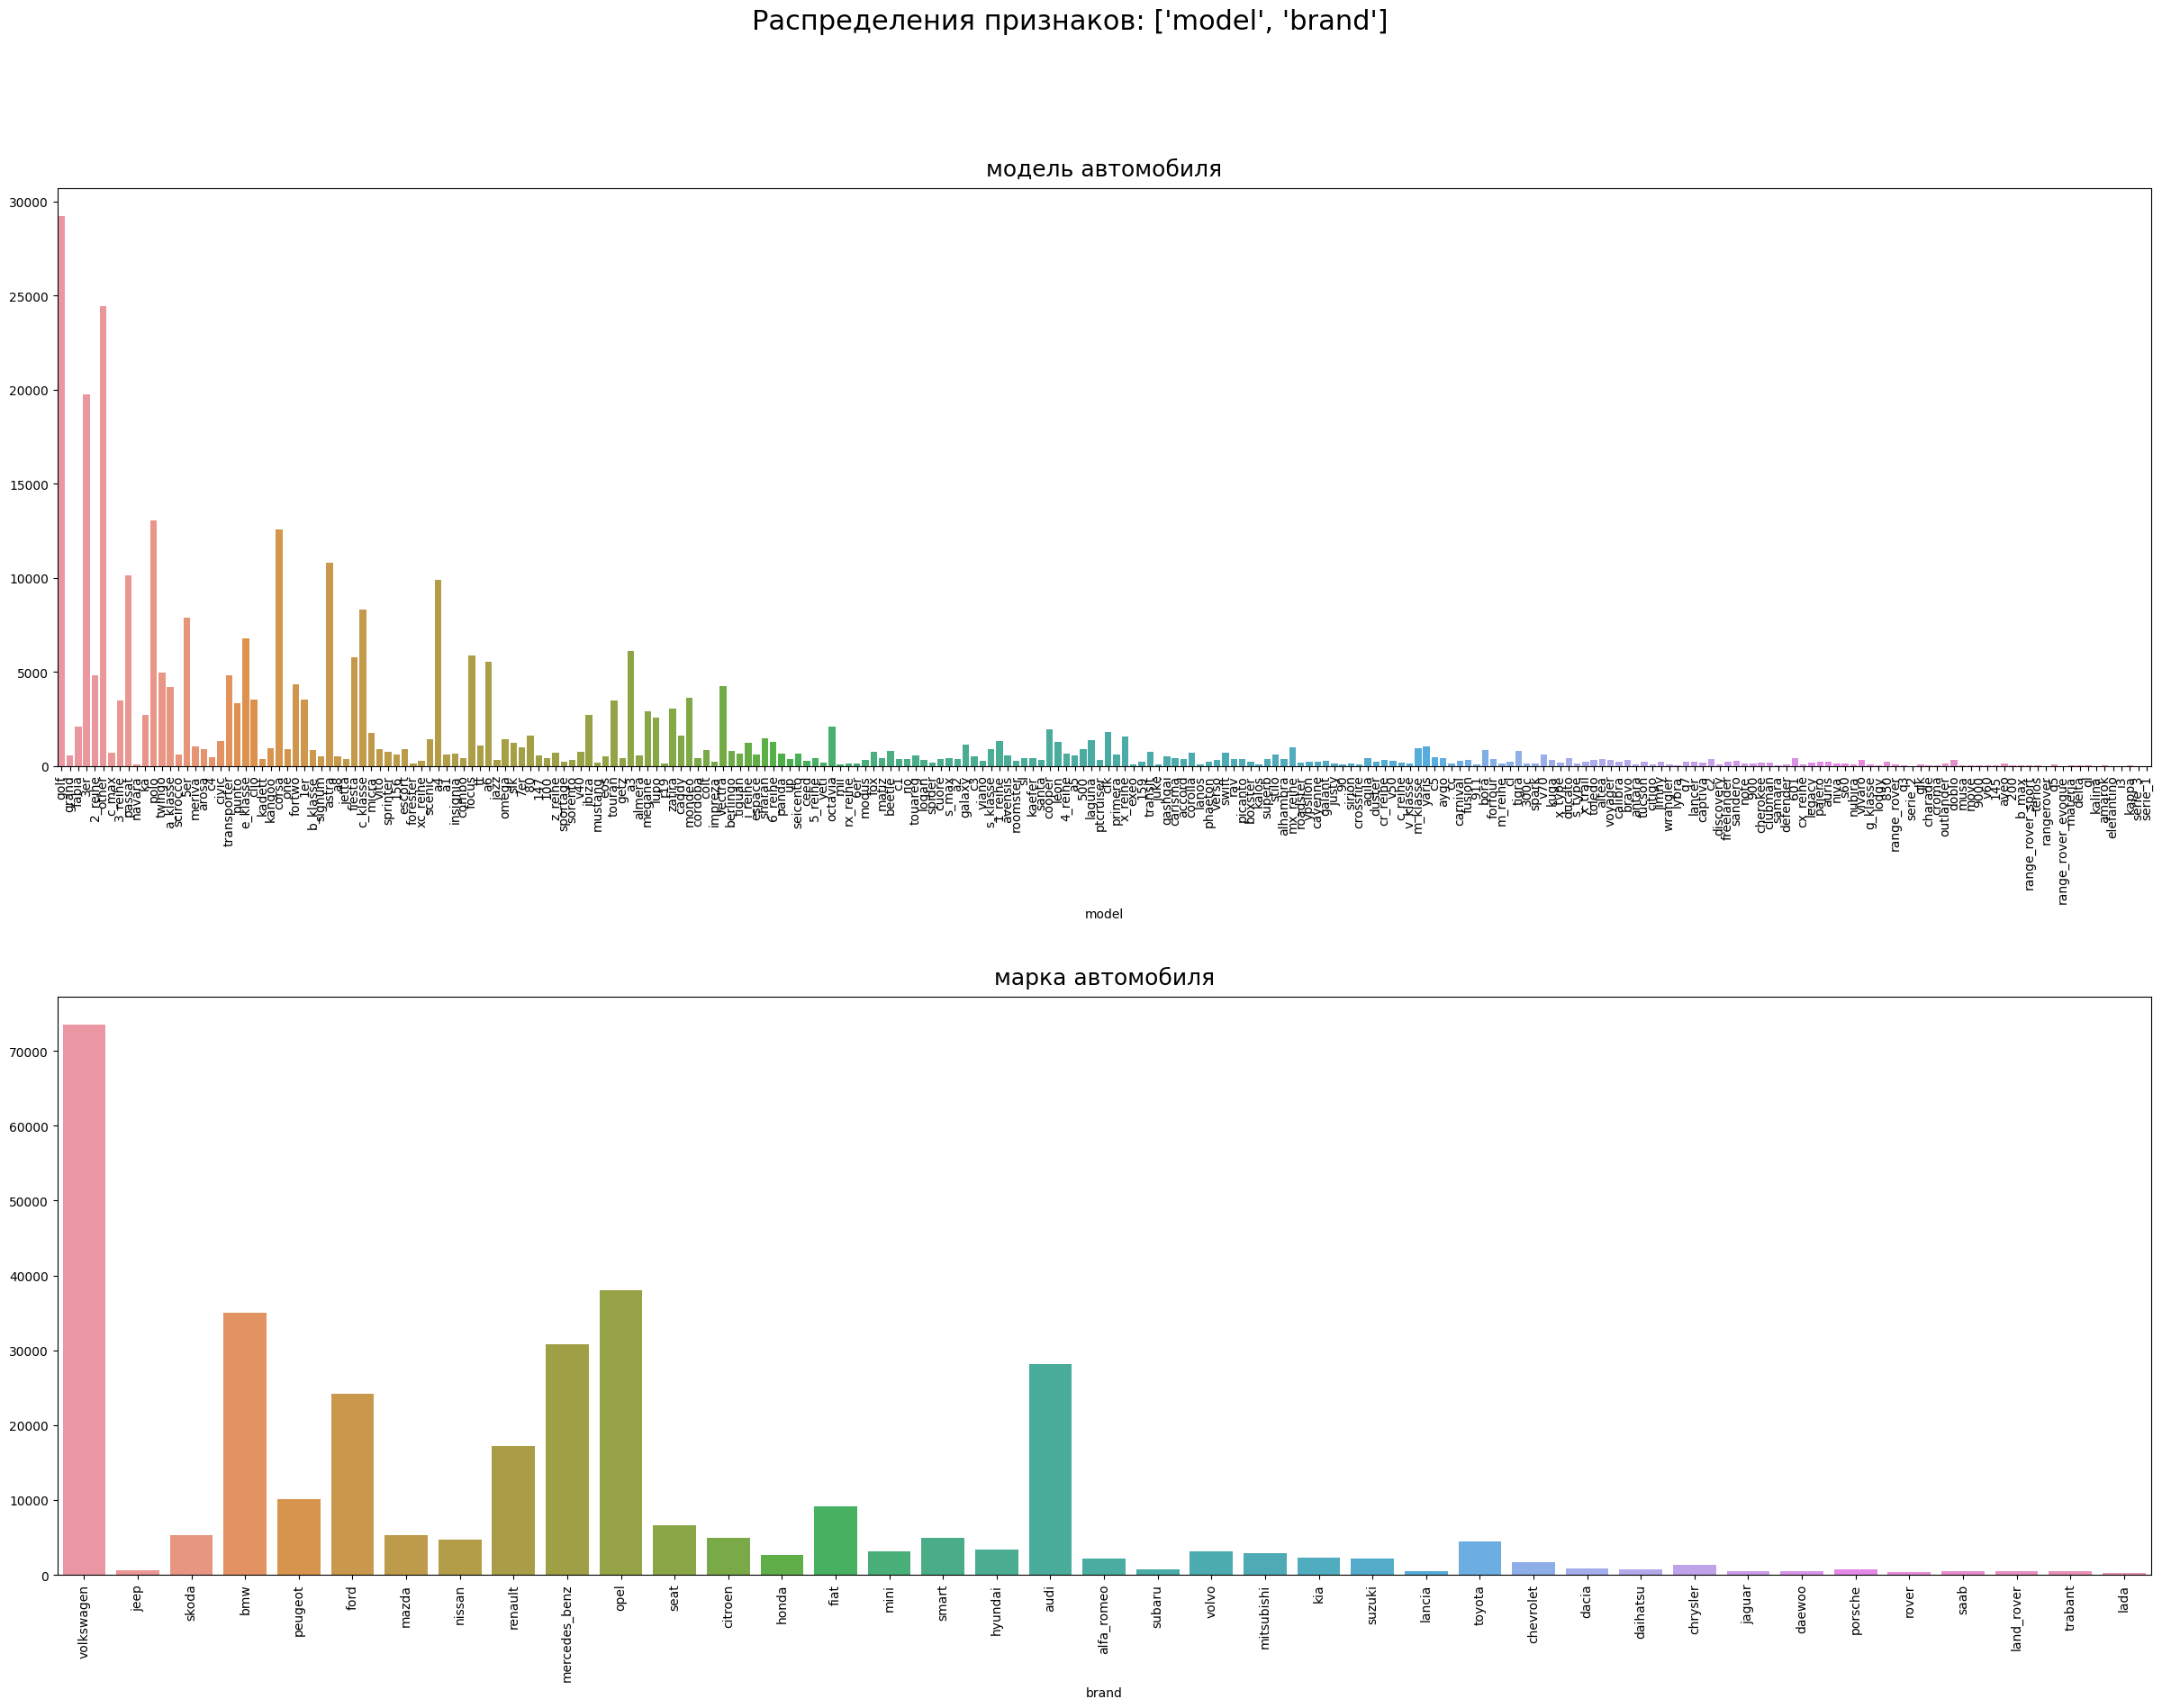

In [26]:
categories = ['model', 'brand']

countplot_categories(data=df,
                     x=categories,
                     xlabel=None,
                     ylabel=None,
                     title={'model': 'модель автомобиля',
                            'brand': 'марка автомобиля',},
                     suptitle=(f'Распределения признаков: {categories}'),
                     nrows=2,
                     ncols=1,
                     rotation=90,
                     figsize=(30, 20))

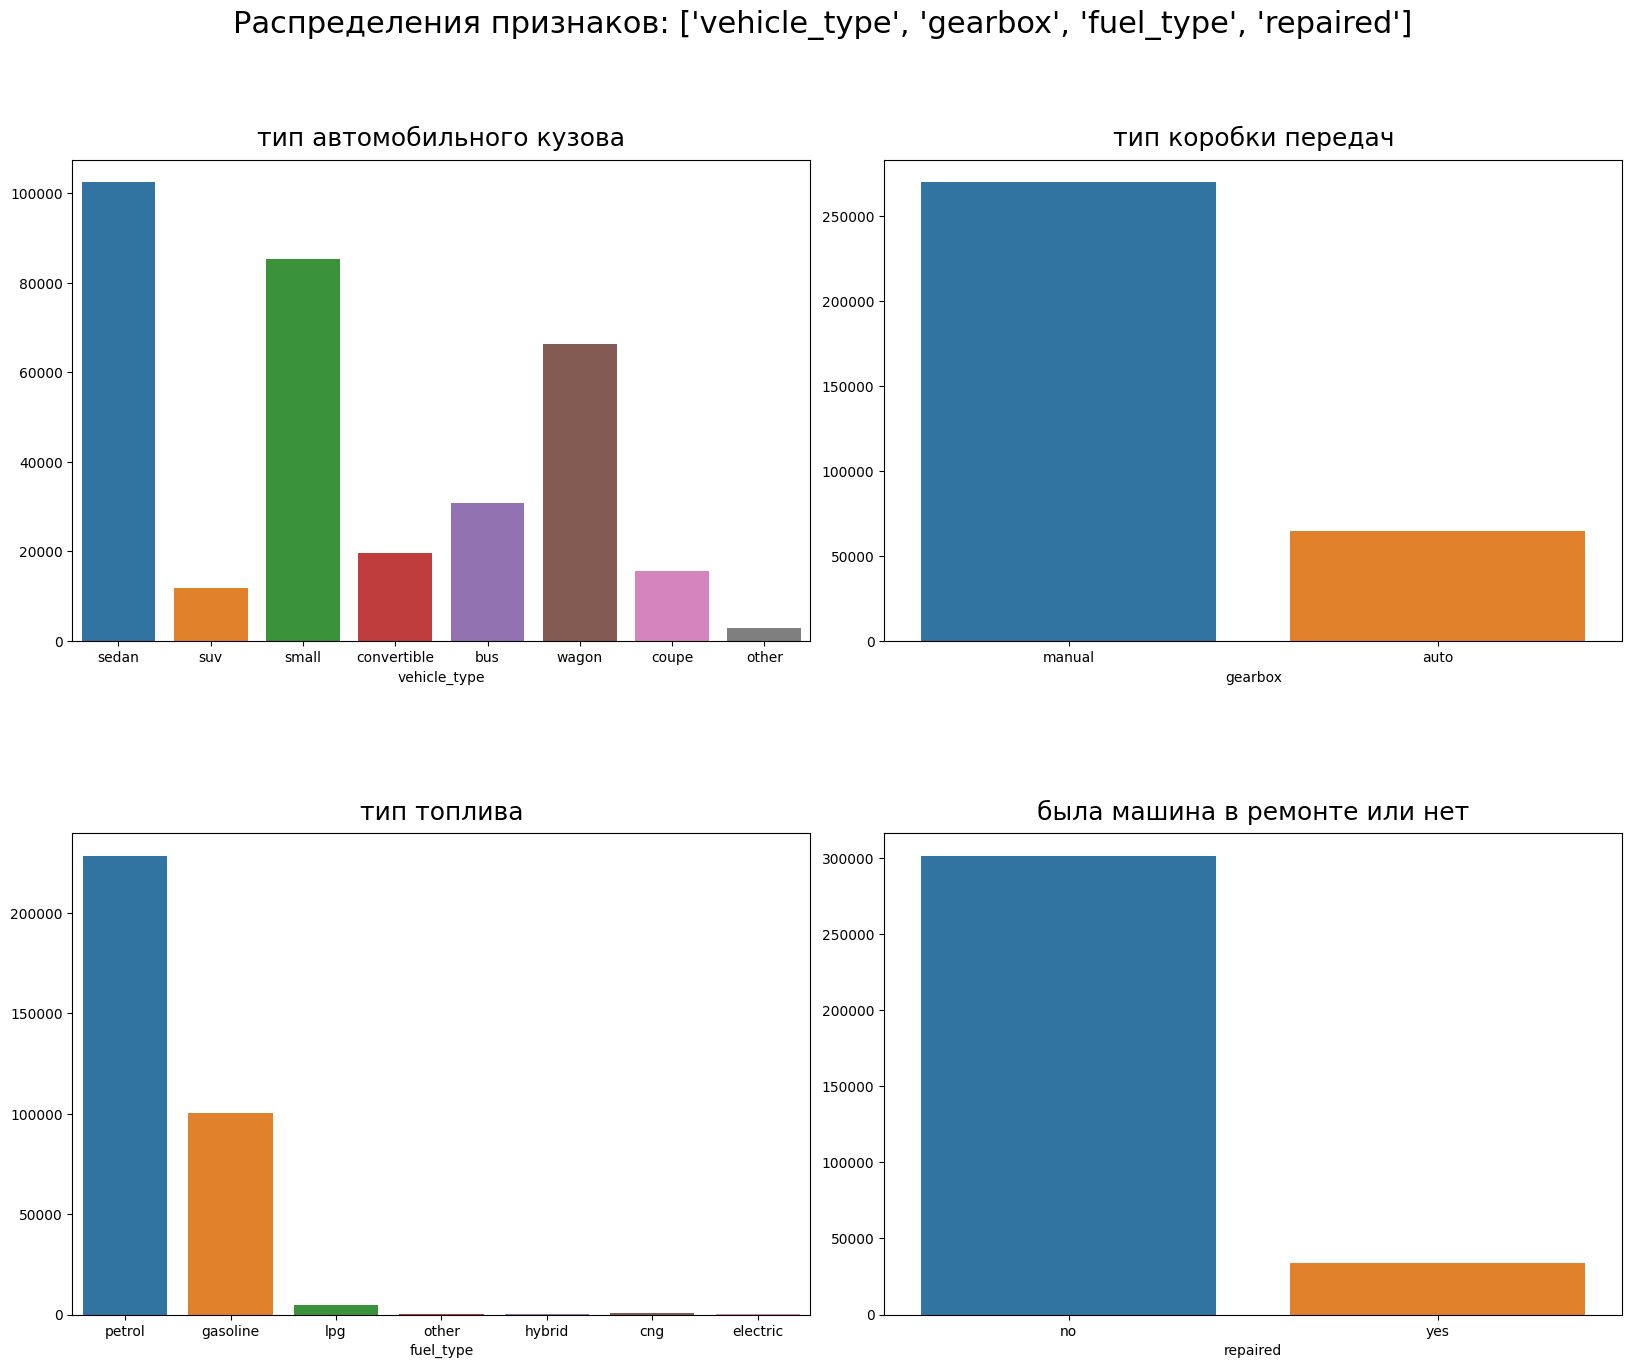

In [27]:
categories = ['vehicle_type', 'gearbox', 'fuel_type', 'repaired']

countplot_categories(data=df,
                     x=categories,
                     xlabel=None,
                     ylabel=None,
                     title={'vehicle_type': 'тип автомобильного кузова',
                            'gearbox': 'тип коробки передач',
                            'fuel_type': 'тип топлива',
                            'repaired': 'была машина в ремонте или нет'},
                     suptitle=(f'Распределения признаков: {categories}'),
                     nrows=2,
                     ncols=2,
                     rotation=0,
                     figsize=(20, 15))

In [28]:
df.loc[((df['model'] == 'range_rover_evoque') | 
        (df['model'] == 'range_rover_sport') | 
        (df['model'] == 'rangerover')), 
       'model'] = 'range_rover'

**Выводы изучения распределения категориальных признаков:**

>1. Значимых аномалий в распределении данных - нет;
>2. Во всех представленных категориальных признаках имеется дисбаланс классов. Возможно необходимо будет применить Upsampling и Downsampling для борьбы с дисбанасом.

**Посмотрим на распределения числовых признаков `price`, `registration_year`, `power`, `kilometer`.**

In [29]:
def histplot_numeric(data, x, xlabel=None, ylabel=None, title=None, suptitle=None, nrows=1, ncols=1, hue=None, figsize=(3 , 3)):
    
    plt.figure(figsize=figsize)
    
    for i in enumerate(x):
        plt.subplot(nrows, ncols, i[0] + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.6)
        sns.histplot(x=data[i[1]])
        plt.xlabel(i[1])
        plt.ylabel(ylabel)
        plt.title(title[i[1]], fontsize=18, pad=10)
        plt.xticks(rotation=0)

    plt.suptitle(suptitle, fontsize=22)
    plt.show()

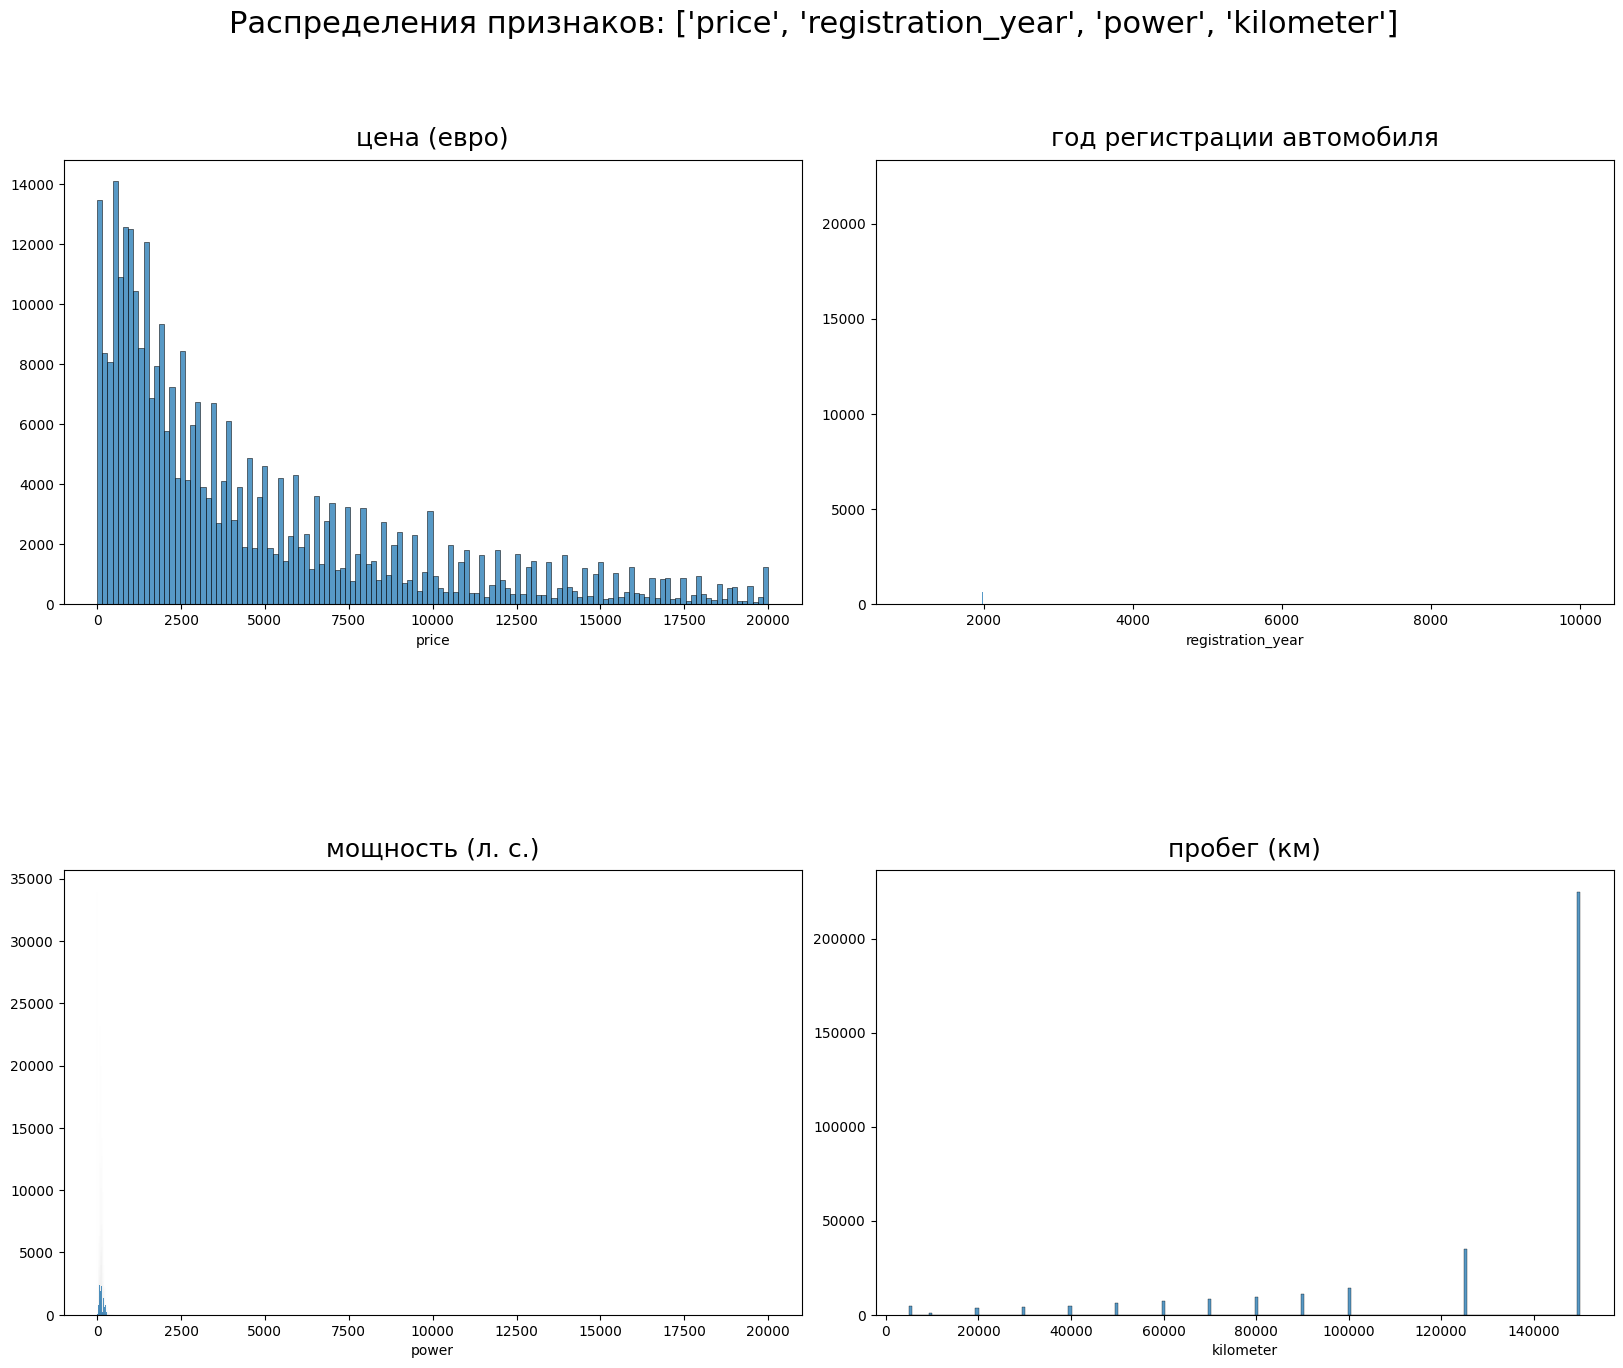

In [30]:
numeric = ['price', 'registration_year', 'power', 'kilometer']

histplot_numeric(data=df,
                 x=numeric,
                 xlabel=None,
                 ylabel=None,
                 title={'price': 'цена (евро)',
                        'registration_year': 'год регистрации автомобиля',
                        'power': 'мощность (л. с.)',
                        'kilometer': 'пробег (км)'},
                 suptitle=(f'Распределения признаков: {numeric}'),
                 nrows=2,
                 ncols=2,
                 figsize=(20, 15))

In [31]:
def boxplot_numeric(data, x, xlabel=None, ylabel=None, title=None, suptitle=None, nrows=1, ncols=1, hue=None, figsize=(3 , 3)):
    
    plt.figure(figsize=figsize)
    
    for i in enumerate(x):
        plt.subplot(nrows, ncols, i[0] + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.6)
        sns.boxplot(x=data[i[1]])
        plt.xlabel(i[1])
        plt.ylabel(ylabel)
        plt.title(title[i[1]], fontsize=18, pad=10)
        plt.xticks(rotation=0)

    plt.suptitle(suptitle, fontsize=22)
    plt.show()

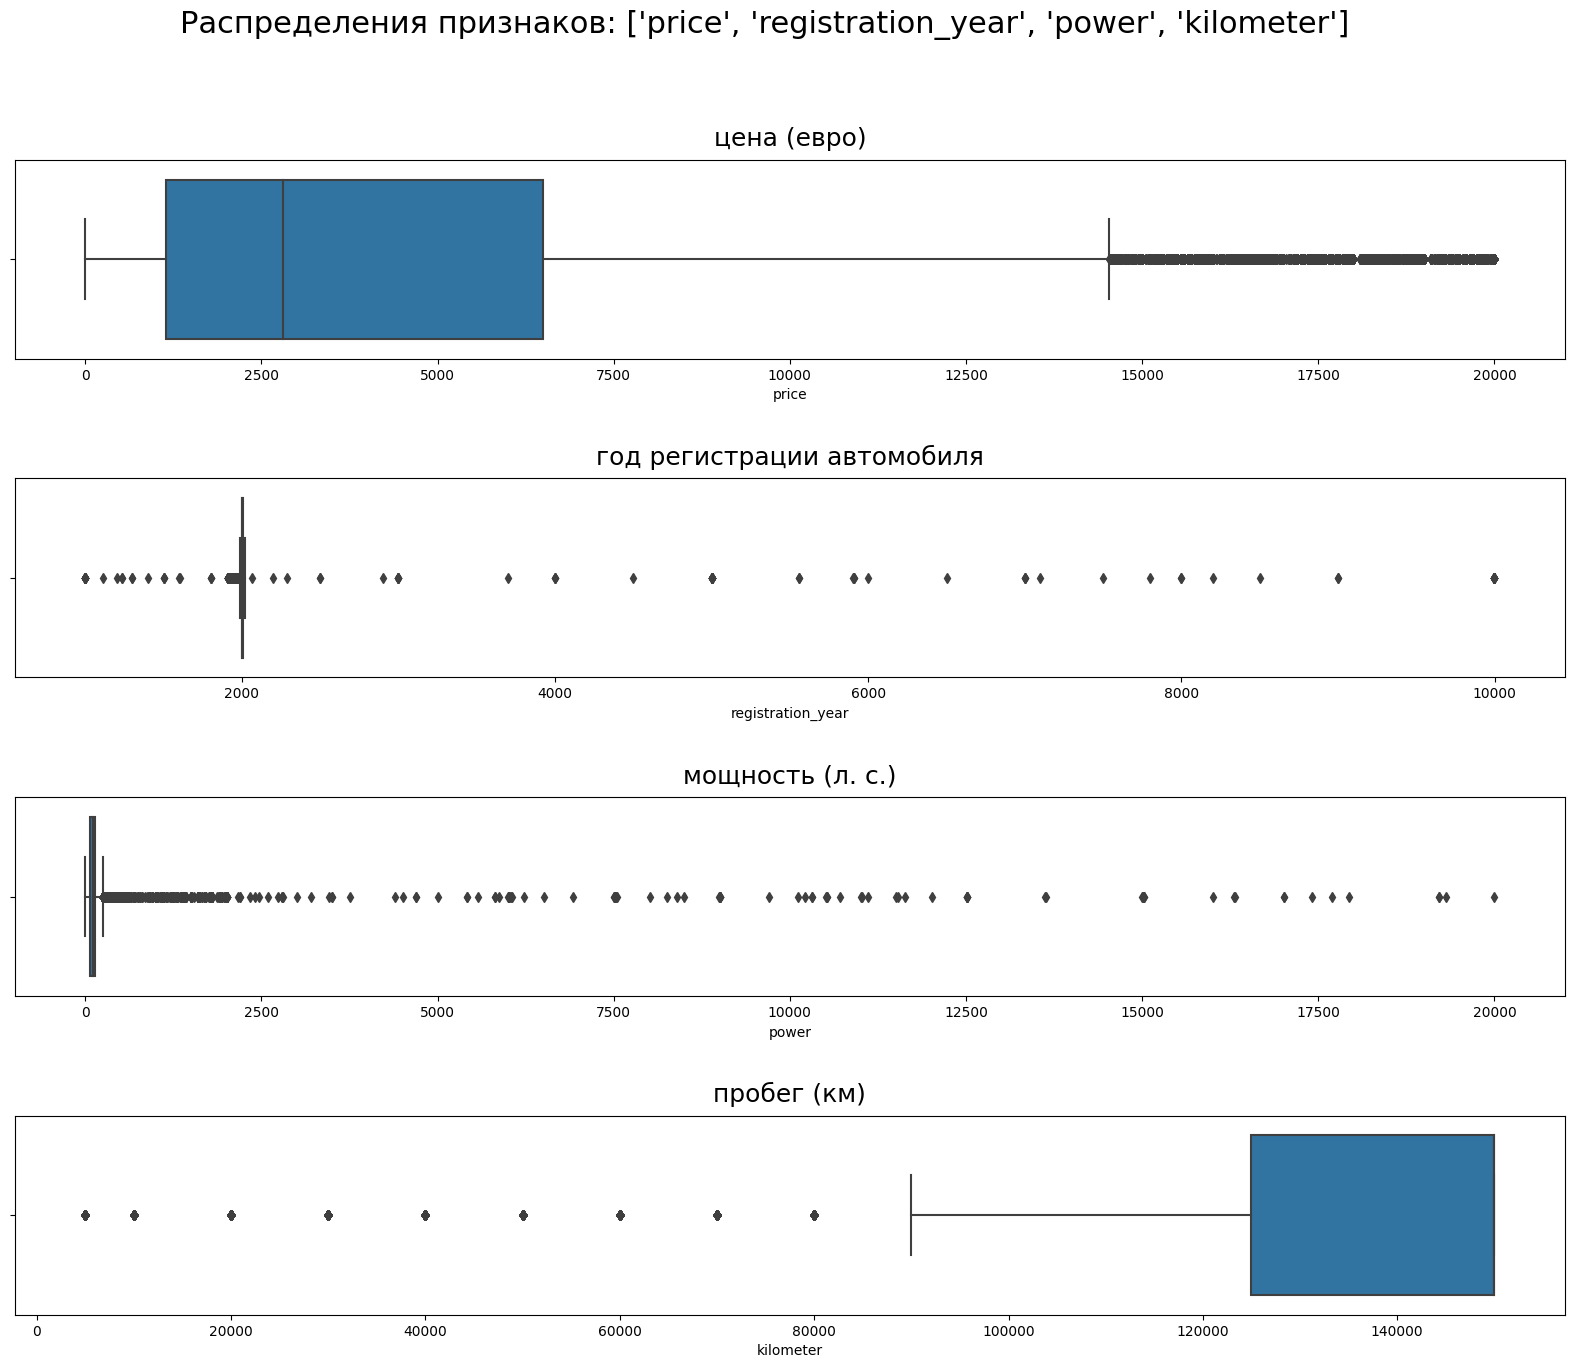

In [32]:
numeric = ['price', 'registration_year', 'power', 'kilometer']

boxplot_numeric(data=df,
                x=numeric,
                xlabel=None,
                ylabel=None,
                title={'price': 'цена (евро)',
                       'registration_year': 'год регистрации автомобиля',
                       'power': 'мощность (л. с.)',
                       'kilometer': 'пробег (км)'},
                suptitle=(f'Распределения признаков: {numeric}'),
                nrows=4,
                ncols=1,
                figsize=(20, 15))

**Выводы изучения распределения числовых признаков:**

>1. В признаке `registration_year` обнаружены выбросы аномальных значений. Необходимо ограничить диапазон значений между `1950` и `2023` годом.
>2. В признаке `power`  обнаружены выбросы аномальных значений. Необходимо ограничить диапазон значений между `30` и `1500` л.с.
>2. В признаке `price`  обнаружены нулевые значения. Необходимо ограничить диапазон значений от `10` евро.
>3. В признаке`kilometer` данные распредены нормально. Аномалий не обнаружено.

**В признаке `registration_year` удалим значения меньше `1970` и больше `2023` года.**

In [33]:
df.query('registration_year < 1970').shape[0]

852

In [34]:
df.query('registration_year > 2016').shape[0]

12483

In [35]:
df

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,sedan,1993,manual,0,golf,150000,petrol,volkswagen,no
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,no
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
...,...,...,...,...,...,...,...,...,...,...
354363,1150,bus,2000,manual,0,zafira,150000,petrol,opel,no
354364,0,sedan,2005,manual,0,colt,150000,petrol,mitsubishi,yes
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


In [36]:
df.drop(df.loc[df['registration_year'] < 1970].index, inplace=True)

In [37]:
df.drop(df.loc[df['registration_year'] > 2016].index, inplace=True)

**В признаке `power` удалим значения меньше `30` и больше `500` л.с.**

In [38]:
df.query('power < 30').shape[0]

31122

In [39]:
df.query('power > 600').shape[0]

305

In [40]:
df.drop(df.loc[df['power'] < 30].index, inplace=True)

In [41]:
df.drop(df.loc[df['power'] > 600].index, inplace=True)

**В признаке `price` удалим значения меньше `10` евро.**

In [42]:
df.query('price < 10').shape[0]

6128

In [43]:
df.drop(df.loc[df['price'] < 10].index, inplace=True)

**Посмотрим как изменились графики.**

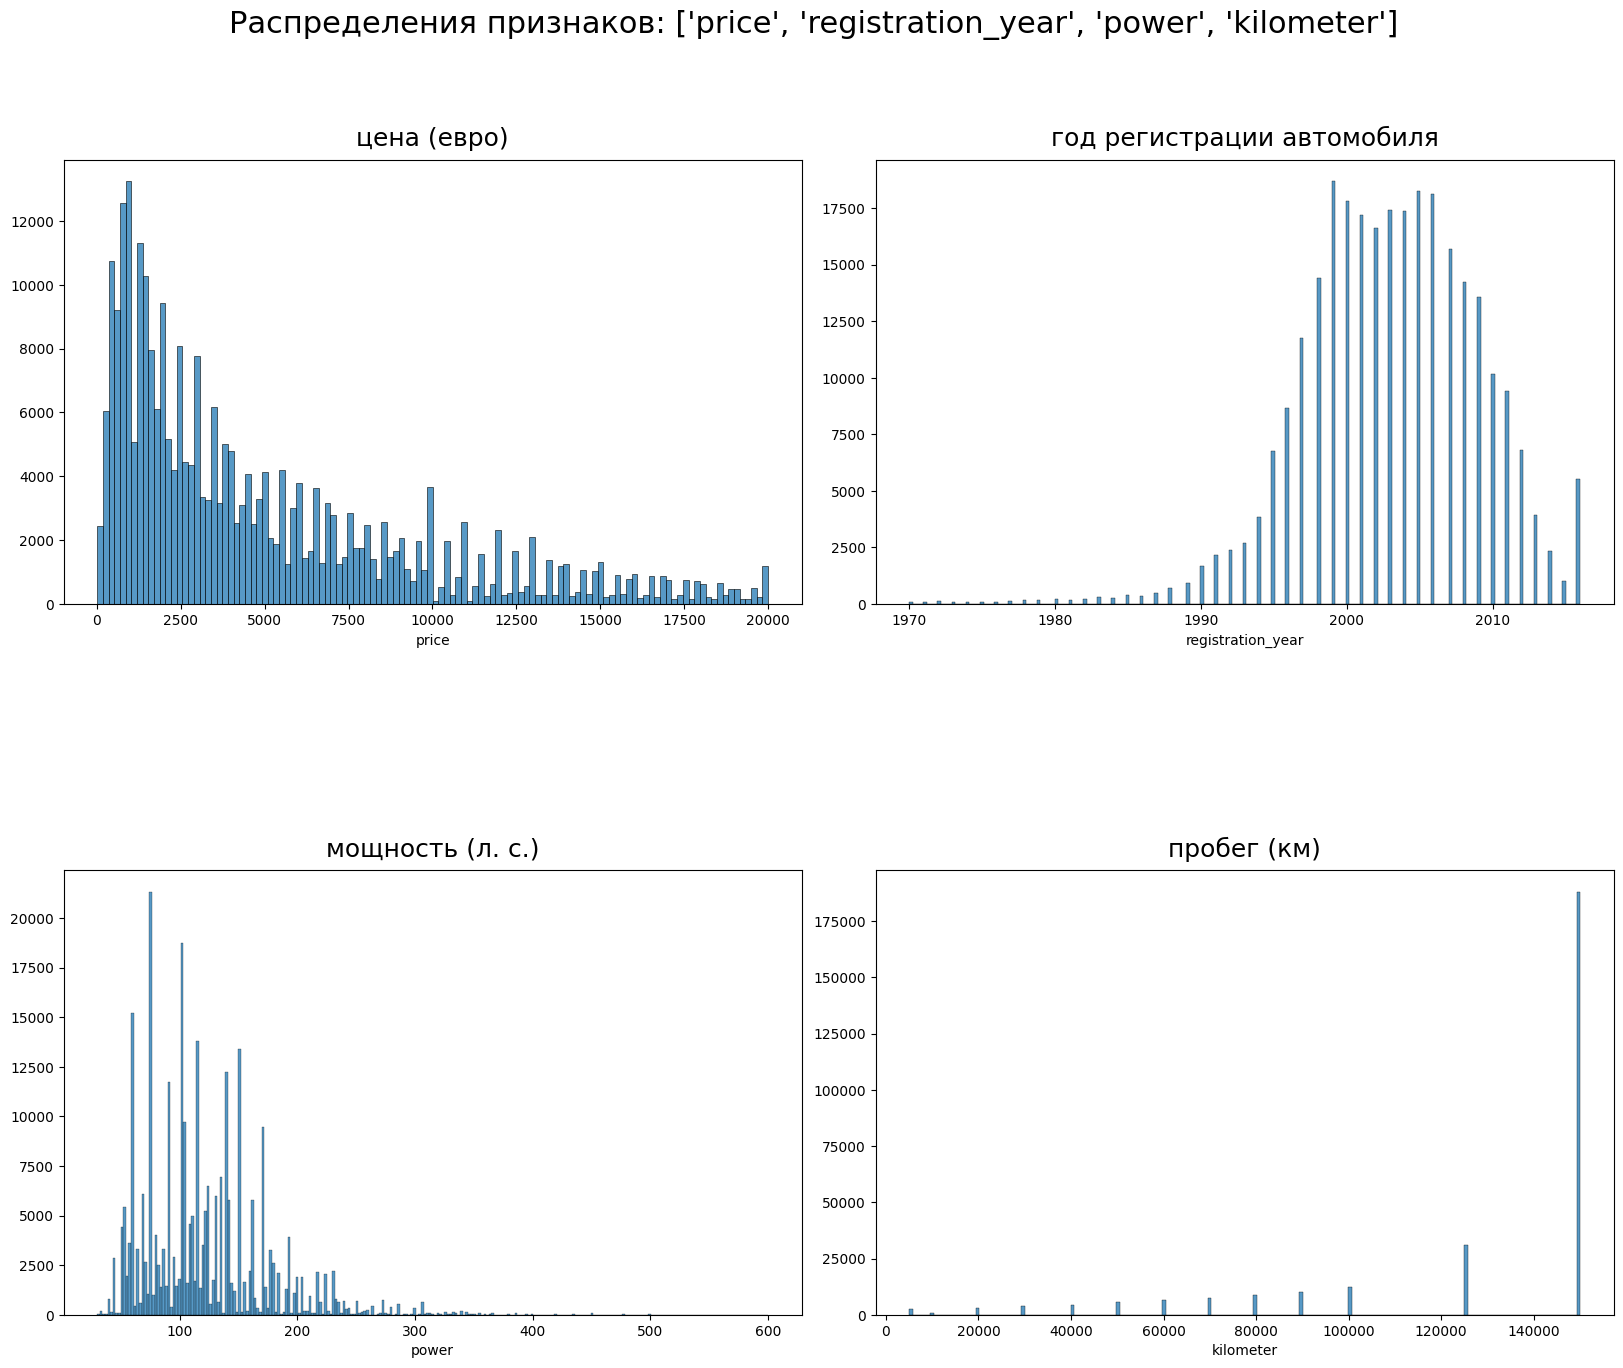

In [44]:
numeric = ['price', 'registration_year', 'power', 'kilometer']

histplot_numeric(data=df,
                 x=numeric,
                 xlabel=None,
                 ylabel=None,
                 title={'price': 'цена (евро)',
                        'registration_year': 'год регистрации автомобиля',
                        'power': 'мощность (л. с.)',
                        'kilometer': 'пробег (км)'},
                 suptitle=(f'Распределения признаков: {numeric}'),
                 nrows=2,
                 ncols=2,
                 figsize=(20, 15))

**Матрица корреляций:**

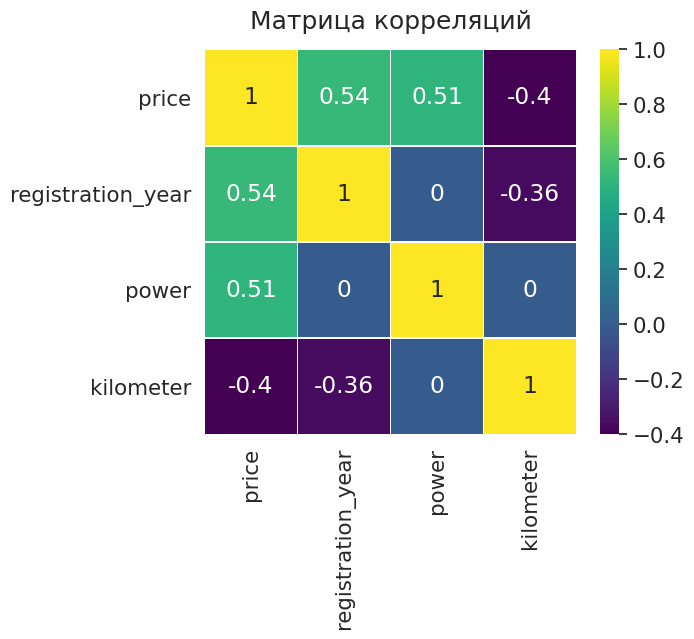

In [45]:
plt.figure(figsize=(6, 5))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='viridis')

plt.title('Матрица корреляций', fontsize=18, pad=15)
plt.show()

**Видим `среднюю положительную корреляцию` признаков `price` и `registration_year`, `power`.**  
**А также `среднюю отрицательную корреляцию` признаков `kilometer` и `price`, `registration_year`.**

### Работа с дубликатами

**Удалим дубликаты.**

In [46]:
df = df.drop_duplicates()

### Работа с целевым признаком

**Разделим данные на `признаки` и `целевой признак`:**  
* `X` — «признаки»;
* `y` — «целевой признак».

In [47]:
X = df.drop(['price'], axis=1)
print(X.shape)

(236106, 9)


In [48]:
y = df['price']
print(y.shape)

(236106,)


**Разделим полученные данные в переменных `X`, `y` на `обучающую` и `тестовую` выборки в пропорции `80`:`20`.**

**Данные запишем в новые переменные:**  

`X_train` - `80%`  
`X_test` - `20%`  
`y_train` - `80%`  
`y_test` - `20%`  

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)

**Посмотрим на полученные данные.**

In [50]:
print(X_train.shape, X_test.shape)

(188884, 9) (47222, 9)


In [51]:
print(y_train.shape, y_test.shape)

(188884,) (47222,)


### Преобразование категориальных признаков

**Преобразуем категориальные признаки `vehicle_type`, `gearbox`, `model`, `fuel_type`, `brand`, `repaired` в численные методом `OrdinalEncoder()`.**

In [52]:
def ordinal_encoder(fit_data, conversion_data):

    object_cols = fit_data.select_dtypes(include=['object']).columns
    encoder = OrdinalEncoder()
    encoder.fit(fit_data[object_cols])
    
    encoded_data = encoder.transform(conversion_data[object_cols])
    
    encoded_data = pd.DataFrame(encoded_data, columns=conversion_data[object_cols].columns)
    encoded_data.index = conversion_data.index
    new_df = pd.concat([conversion_data.drop(object_cols, axis=1), encoded_data], axis=1)
    
    return new_df

In [53]:
X_train_encoded = ordinal_encoder(fit_data=X_train, conversion_data=X_train)

In [54]:
X_test_encoded = ordinal_encoder(fit_data=X_train, conversion_data=X_test)

In [55]:
X_train_encoded.head(3)

,registration_year,power,kilometer,vehicle_type,gearbox,model,fuel_type,brand,repaired
275924,2003,110,150000,3.00,1.00,209.00,2.00,20.00,0.00
312214,2007,101,20000,5.00,1.00,169.00,6.00,9.00,0.00
199602,2004,150,150000,0.00,0.00,232.00,2.00,20.00,0.00


In [56]:
X_test_encoded.head(3)

,registration_year,power,kilometer,vehicle_type,gearbox,model,fuel_type,brand,repaired
22869,2001,68,80000,0.00,1.00,220.00,2.00,37.00,0.00
97392,2004,136,150000,0.00,1.00,218.00,2.00,37.00,0.00
136045,2003,122,150000,7.00,1.00,59.00,2.00,20.00,0.00


In [57]:
print(X_train_encoded.shape, X_test_encoded.shape)

(188884, 9) (47222, 9)


### Стандартизация признаков

**Для `линейных моделей ML обучения` преобразуем масштаб количественных признаков `registration_year`, `power`, `kilometer`, методом стандартизации.**  
**Данные запишем в новые переменные `X_train_scaled` и `X_test_scaled`.**

In [58]:
X_train_scaled, X_test_scaled = X_train_encoded.copy(), X_test_encoded.copy()

In [59]:
features = ['registration_year', 'power', 'kilometer']

In [60]:
scaler = StandardScaler()

In [61]:
scaler.fit(X_train_encoded[features])

StandardScaler()

In [62]:
X_train_scaled[features] = scaler.transform(X_train_scaled[features])

In [63]:
X_test_scaled[features] = scaler.transform(X_test_scaled[features])

In [64]:
X_train_scaled.head(3)

,registration_year,power,kilometer,vehicle_type,gearbox,model,fuel_type,brand,repaired
275924,-0.02,-0.23,0.62,3.00,1.00,209.00,2.00,20.00,0.00
312214,0.62,-0.40,-2.85,5.00,1.00,169.00,6.00,9.00,0.00
199602,0.14,0.51,0.62,0.00,0.00,232.00,2.00,20.00,0.00


In [65]:
X_test_scaled.head(3)

,registration_year,power,kilometer,vehicle_type,gearbox,model,fuel_type,brand,repaired
22869,-0.34,-1.02,-1.25,0.00,1.00,220.00,2.00,37.00,0.00
97392,0.14,0.25,0.62,0.00,1.00,218.00,2.00,37.00,0.00
136045,-0.02,-0.01,0.62,7.00,1.00,59.00,2.00,20.00,0.00


In [66]:
print(X_train_scaled.shape, X_test_scaled.shape)

(188884, 9) (47222, 9)


## Обучение моделей

### SGDRegressor

**Обучим модель `SGDRegressor` на стандартизированной выборке `X_train_scaled`.**

In [67]:
model = SGDRegressor(random_state=42)

scoring = {'R2': 'r2',
           'RMSE': 'neg_root_mean_squared_error'}

param_search = {
    'alpha' : [0.0001, 0.001],
    'max_iter': list(range(1_000, 3_000, 100))
}

gs = GridSearchCV(estimator=model,
                  cv=4,
                  param_grid=param_search,
                  scoring=scoring,
                  refit='RMSE',
                  n_jobs=-1,
                  return_train_score=True)

In [68]:
%%time

gs.fit(X_train_scaled, y_train)
results_model_SGDRegressor = gs.cv_results_

CPU times: user 14.6 s, sys: 463 ms, total: 15.1 s
Wall time: 11min 20s


In [69]:
gs.best_score_

-384416476025.7215

In [70]:
results_model_SGDRegressor['mean_test_RMSE'][gs.best_index_]

-384416476025.7215

In [71]:
results_model_SGDRegressor['mean_test_R2'][gs.best_index_]

-9848298172990306.0

**Сохраним обученную модель с помощью библиотеки `GridSearchCV` в `model_SGDRegressor.joblib`.**

In [72]:
joblib.dump(gs.best_estimator_, 'model_SGDRegressor.joblib')

['model_SGDRegressor.joblib']

### CatBoostRegressor

**Обучим модель `CatBoostRegressor` на выборке `X_train_encoded`.**

In [73]:
model = CatBoostRegressor(random_state=42)

scoring = {'R2': 'r2',
           'RMSE': 'neg_root_mean_squared_error'}

param_search = {
    'max_depth': [2, 4, 6],
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'iterations': list(range(10, 210, 30)),
    'logging_level': ['Silent']
}

gs = GridSearchCV(estimator=model,
                  cv=4,
                  param_grid=param_search,
                  scoring=scoring,
                  refit='RMSE',
                  n_jobs=-1,
                  return_train_score=True)

In [74]:
%%time

gs.fit(X_train_encoded, y_train)
results_model_CatBoostRegressor = gs.cv_results_

CPU times: user 21.3 s, sys: 3.81 s, total: 25.1 s
Wall time: 49min 58s


In [75]:
gs.best_score_

-1720.5596017148114

In [76]:
results_model_CatBoostRegressor['mean_test_RMSE'][gs.best_index_]

-1720.5596017148114

In [77]:
results_model_CatBoostRegressor['mean_test_R2'][gs.best_index_]

0.865755062560889

**Сохраним обученную модель с помощью библиотеки `GridSearchCV` в `model_CatBoostRegressor.joblib`.**

In [78]:
joblib.dump(gs.best_estimator_, 'model_CatBoostRegressor.joblib')

['model_CatBoostRegressor.joblib']

###  LGBMRegressor

**Обучим модель `LGBMRegressor` на выборке `X_train`.**

In [79]:
model = lgb.LGBMRegressor(random_state=42)

scoring = {'R2': 'r2',
           'RMSE': 'neg_root_mean_squared_error'}

param_search = {
    'max_depth': [2, 4, 6],
    'learning_rate': [0.03, 0.1],
    'n_estimators': [100, 200, 500]
}

gs = GridSearchCV(estimator=model,
                  cv=4,
                  param_grid=param_search,
                  scoring=scoring,
                  refit='RMSE',
                  n_jobs=-1,
                  return_train_score=True)

In [80]:
%%time

gs.fit(X_train_encoded, y_train)
results_model_LGBMRegressor = gs.cv_results_

CPU times: user 13.5 s, sys: 267 ms, total: 13.8 s
Wall time: 3min 43s


In [81]:
gs.best_score_

-1610.6652876589278

In [82]:
results_model_LGBMRegressor['mean_test_RMSE'][gs.best_index_]

-1610.6652876589278

In [83]:
results_model_LGBMRegressor['mean_test_R2'][gs.best_index_]

0.8823564773978645

**Сохраним обученную модель с помощью библиотеки `GridSearchCV` в `model_LGBMRegressor.joblib`.**

In [84]:
joblib.dump(gs.best_estimator_, 'model_LGBMRegressor.joblib')

['model_LGBMRegressor.joblib']

###  Выводы из проведенного обучения моделей:

1. Модель стохастического градиентного спуска `SGDRegressor`:
- подбор гиперпараметров - 56.4 s, 
- скорость обучения - 28.2 s, 
- скорость предсказания - 11 ms
2. Модель градиентного бустинга `CatBoostRegressor`:
- подбор гиперпараметров - 59min 35s, 
- скорость обучения - 4.29 s, 
- скорость предсказания - 21.3 ms
3. Модель градиентного бустинга `LGBMRegressor`:
- подбор гиперпараметров - 3min 44s, 
- скорость обучения - 6.98 s, 
- скорость предсказания - 2.1 s

**`LGBMRegressor` демонстрирует высокую скорость обучения и высокое качество, достаточно информативная документация.**

**Для данной задачи, лучшая для заказчика в плане качества предсказания, скорости предсказания, времени обучения - `LGBMRegressor`.**

## Анализ модели

**Функция потерь и оценки качества моделей RMSE:**

In [85]:
def RMSE(y, predict):
    RMSE = mean_squared_error(y, predict) ** 0.5
    return RMSE

score = make_scorer(RMSE, greater_is_better=False)

**Проанализируем `LGBMRegressor` на скорость обучения и предсказания.**  
**Анализ модели проведем на выборках `X_test`, `y_test`.**

In [86]:
model_LGBMRegressor = joblib.load('model_LGBMRegressor.joblib')

In [87]:
%%time

model_LGBMRegressor.fit(X_train_encoded, y_train)

CPU times: user 13.9 s, sys: 141 ms, total: 14 s
Wall time: 3.65 s


LGBMRegressor(max_depth=6, n_estimators=500, random_state=42)

In [88]:
%%time

predictions = model_LGBMRegressor.predict(X_test_encoded)

CPU times: user 3.12 s, sys: 3.52 ms, total: 3.12 s
Wall time: 813 ms


In [89]:
print('RMSE на тестовой выборке: ', RMSE(y_test, predictions).round(2))

RMSE на тестовой выборке:  1611.14


`LGBMRegressor`:
- RMSE на тестовой выборке: - 1610.05, 
- подбор гиперпараметров - 3min 44s, 
- скорость обучения - 4.79 s, 
- скорость предсказания - 942 ms

## Проверка моделей на адекватность

**DummyRegressor**

In [90]:
strategies = ['mean', 'median']

for strategy in strategies:
    
    model = DummyRegressor(strategy=strategy)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    result = RMSE(y_test, predictions).round(2)
    
    print(f'{strategy} = {result}')

mean = 4680.71
median = 4956.53


**Результаты `обученных моделей` на `тестовой выборке` показали результат выше, чем результаты `DummyRegressor`. Это даёт право сделать вывод, что модели проходят проверку на адекватность.**

## Общий вывод

**По результатам исследований моделей для поставленной задачи наиболее оптимальными являются модели:**  

- `CatBoostRegressor`
- `LGBMRegressor`

**`CatBoostRegressor` показывает хорошие показатели метрик и скорости обучения и предсказания, интуитивно понятная документация с широкими возможностями реализации.**

**`LGBMRegressor` демонстрирует высокую скорость обучения и высокое качество, достаточно информативная документация.**

**Для данной задачи, лучшая для заказчика в плане качества предсказания, скорости предсказания, времени обучения - `LGBMRegressor`.**

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей